# Exercise 1.3

In [255]:
# Defining imports
import matplotlib.pyplot as plt
import numpy as np

In [256]:
# Defining variables
start_temp = 298.15  # [K]
measured_temps_celc = [25, 43, 57, 21, 32, 43, 50]  # [C]
measured_temps = [temp + 273.15 for temp in measured_temps_celc]  # [K]

volume = 0.025  # [m3]

atmospheric_pressure = 100  # [kPa]
start_tire_pressure = 210  # [kPa]
total_start_pressure = atmospheric_pressure + start_tire_pressure  # [kPa]

R = 287  # [(Pa m3) / (kg K)]

In [257]:
def calculate_air_pressure(T_0, T_1, P_0) -> float:
    return P_0 * (T_1 / T_0)


def air_pressure(temps: list[float], start_temp: float, start_pressure: float) -> tuple[list[float], list[float]]:
    """
    Returns a list of calculated air pressures and a list of difference in air pressure
    """
    calculated_air_pressures = [calculate_air_pressure(T_0=start_temp, T_1=temp, P_0=start_pressure) for temp in temps]
    air_pressure_difference = [end_pressure - start_pressure for end_pressure in calculated_air_pressures]
    return calculated_air_pressures, air_pressure_difference


def calculate_mass_release(dP: float, V: float, R: float, T_1: float) -> float:
    return (dP * V) / (R * T_1)

In [258]:
def plot_mass_release() -> None:
    pressures, pressure_differences = air_pressure(measured_temps, start_temp=start_temp,
                                                   start_pressure=start_tire_pressure)
    mass_releases = [calculate_mass_release(dP=dP, V=volume, R=R, T_1=start_temp) for dP in pressure_differences]

    plt.plot(mass_releases, pressure_differences, 'o')

    plt.xlabel("Air release [kg]")
    plt.ylabel("Difference in air pressure [kPa]")

    plt.grid(linestyle=":")
    plt.show()

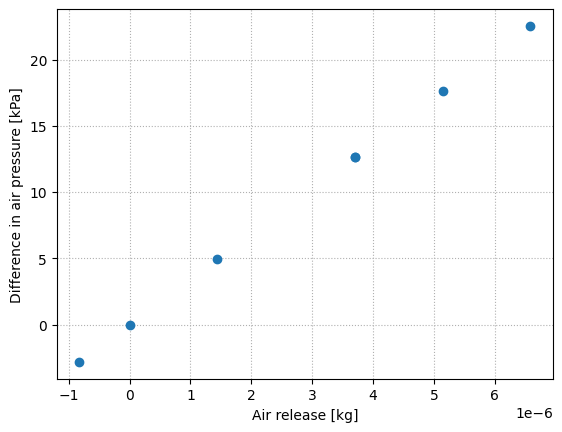

In [259]:
plot_mass_release()

# Exercise 2.2a

In [260]:
def air_pressure_simple(z: float, p_0: float, rho: float, g: float = - 9.81) -> float:
    return p_0 + rho * g * z


def air_pressure(z: float, p_0: float, T: float, g: float = 9.81, R: float = 287) -> float:
    T += 273.15  # Converting temperature to Kelvin
    return np.multiply(p_0, np.power(np.e, - np.divide(np.multiply(g, z), np.multiply(R, T))))


def air_pressure_advanced(z: float, alpha: float, T_0: float, g: float = 9.81) -> None:
    T_0 += 273.15  # Converting temperature to Kelvin
    return np.multiply(p_0, np.power(1 - np.divide(np.multiply(alpha, z), T_0), np.divide(g, R * alpha)))

In [261]:
def plot(x_label: str, y_label: str, y_axis: list, *x_axis: list) -> None:
    for x in x_axis:
        plt.plot(x, y_axis)

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.grid(linestyle=":")
    plt.show()

In [262]:
# Defining constants
p_0 = 101e3  # [Pa]
rho = 1.2  # [kg/m3]
T = 20  # [C]
alpha = np.divide(70, 10e3)  # [K / m]

In [263]:
heights = np.linspace(0, 10e3, 10_000)  # [m]
pressure_simple = [np.divide(air_pressure_simple(z=z, p_0=p_0, rho=rho), 1e3) for z in
                   heights]  # List of pressures in kPa

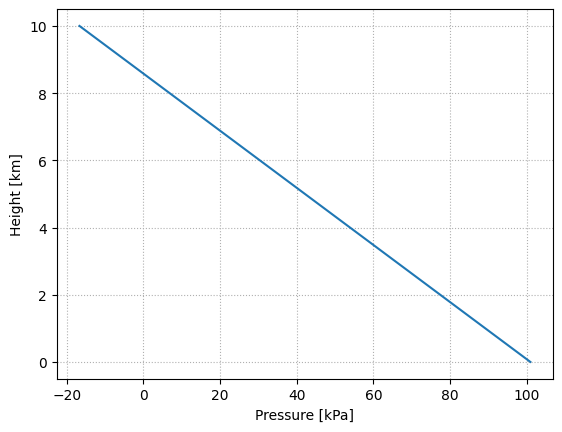

In [264]:
plot("Pressure [kPa]", "Height [km]", np.divide(heights, 1e3), pressure_simple)

# Exercise 2.2b

In [265]:
pressure = [np.divide(air_pressure(z=z, p_0=p_0, T=20), 1e3) for z in heights]

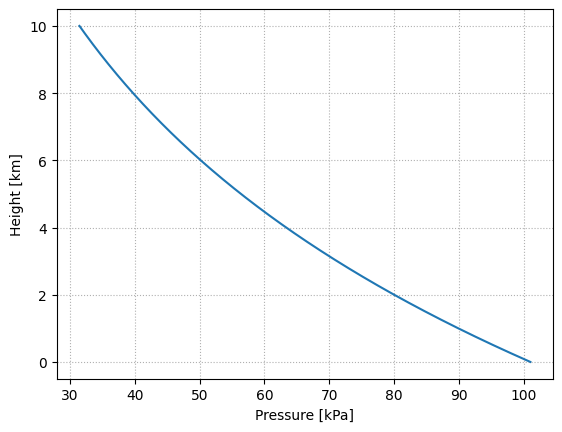

In [266]:
plot("Pressure [kPa]", "Height [km]", np.divide(heights, 1e3), pressure)

# Exercise 2.2c

In [267]:
pressure_advanced = [np.divide(air_pressure_advanced(z=z, alpha=alpha, T_0=T), 1e3) for z in heights]

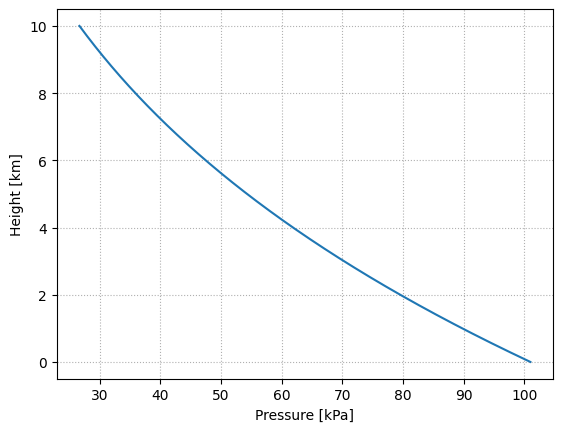

In [268]:
plot("Pressure [kPa]", "Height [km]", np.divide(heights, 1e3), pressure_advanced)

# Exercise 2.2 - combined

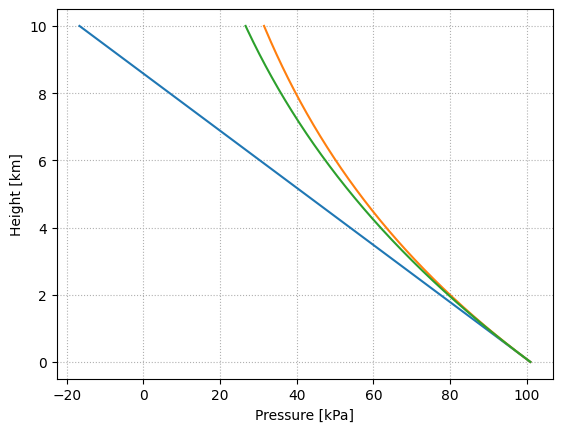

In [269]:
plot("Pressure [kPa]", "Height [km]", np.divide(heights, 1e3), pressure_simple, pressure, pressure_advanced)